In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats.mstats import winsorize

In [2]:
pwd

'/home/dhatri/Internship'

In [3]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False, na_values=['nan', '?'])

In [4]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [6]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Time'] = pd.to_timedelta(data['Time'])

data['Datetime'] = data['Date'] + data['Time']

In [7]:
data.set_index('Datetime', inplace=True)

In [8]:
data.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Datetime', length=2075259, freq=None)

In [9]:
data.index.freq = 'min'

In [10]:
data.index.dtype

dtype('<M8[ns]')

In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [13]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [15]:
data.fillna(method='ffill', inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Freq: T
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [17]:
data['rem_consumption'] = (data['Global_active_power'] * 1000 / 60 - 
                               data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3'])

In [18]:
hourly_data = data.resample(rule='1H').sum()

In [19]:
hourly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption
Datetime,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,103.554,3.684,14224.18,433.0,0.0,0.0,772.0,953.900000
2010-11-26 18:00:00,94.408,3.222,14251.91,397.2,0.0,0.0,0.0,1573.466667
2010-11-26 19:00:00,99.560,3.602,14204.46,423.4,0.0,4.0,0.0,1655.333333


In [20]:
# Columns to winsorize
columns_to_winsorize = data.columns

# Apply winsorization using scipy.stats.mstats.winsorize
for col in columns_to_winsorize:
    hourly_data[col + '_winsorized'] = winsorize(hourly_data[col], limits=(0.05, 0.05))

In [21]:
# smoothed_data = hourly_data['Global_active_power_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_active_power_winsorized'])

In [22]:
# hourly_data['GAP final'] = smoothed_data

In [23]:
# smoothed_data = hourly_data['Global_reactive_power_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_reactive_power_winsorized'])
# hourly_data['GRP final'] = smoothed_data

In [24]:
# smoothed_data = hourly_data['Global_intensity_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Global_intensity_winsorized'])
# hourly_data['GI final'] = smoothed_data

In [25]:
# smoothed_data = hourly_data['Voltage_winsorized'].rolling(window=3, center=True).mean()
# smoothed_data = smoothed_data.fillna(hourly_data['Voltage_winsorized'])
# hourly_data['V final'] = smoothed_data

In [26]:
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption,Global_active_power_winsorized,Global_reactive_power_winsorized,Voltage_winsorized,Global_intensity_winsorized,Sub_metering_1_winsorized,Sub_metering_2_winsorized,Sub_metering_3_winsorized,rem_consumption_winsorized
Datetime,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333,152.024,8.244,14131.81,651.6,0.0,19.0,607.0,1668.266667
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000,171.416,4.802,14131.81,722.0,0.0,393.0,1012.0,1668.266667
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333,171.416,5.114,14131.81,722.0,0.0,86.0,1001.0,1668.266667
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667,171.416,4.506,14131.81,722.0,0.0,0.0,1007.0,1668.266667
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667,171.416,4.600,14229.52,722.0,0.0,25.0,1033.0,1668.266667


In [27]:
hourly_data['hour'] = hourly_data.index.hour
hourly_data['day_of_week'] = hourly_data.index.dayofweek
hourly_data['month'] = hourly_data.index.month
hourly_data['year'] = hourly_data.index.year

In [28]:
def map_hour_category(hour):
    if 23 >= hour >= 23 or 0 <= hour <= 6:
        return 0
    elif 7 <= hour <= 13:
        return 2
    elif 14 <= hour <= 17:
        return 1
    elif 18 <= hour <= 22:
        return 3

def map_day_category(day):
    if 0 <= day <= 4:
        return 0
    elif day == 5 or day == 6:
        return 1

def map_month_category(month):
    if month in [1, 12]:
        return 3
    elif month in [2, 3, 10, 11]:
        return 2
    elif month in [4, 5, 6, 9]:
        return 1
    elif month in [7, 8]:
        return 0
    
def map_year_category(year):
    if year == 2006:
        return 1
    else:
        return 0

In [29]:
hourly_data['hour_category'] = hourly_data['hour'].apply(map_hour_category)
hourly_data['day_category'] = hourly_data['day_of_week'].apply(map_day_category)
hourly_data['month_category'] = hourly_data['month'].apply(map_month_category)
hourly_data['year_category'] = hourly_data['year'].apply(map_year_category)

In [30]:
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,rem_consumption,Global_active_power_winsorized,Global_reactive_power_winsorized,...,Sub_metering_3_winsorized,rem_consumption_winsorized,hour,day_of_week,month,year,hour_category,day_category,month_category,year_category
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0,1907.733333,152.024,8.244,...,607.0,1668.266667,17,5,12,2006,1,1,3,1
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0,2217.200000,171.416,4.802,...,1012.0,1668.266667,18,5,12,2006,3,1,3,1
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0,2313.233333,171.416,5.114,...,1001.0,1668.266667,19,5,12,2006,3,1,3,1
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0,2261.566667,171.416,4.506,...,1007.0,1668.266667,20,5,12,2006,3,1,3,1
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0,1998.466667,171.416,4.600,...,1033.0,1668.266667,21,5,12,2006,3,1,3,1


In [31]:
hourly_consumption = hourly_data.groupby('hour')['Global_active_power'].mean()
hour_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am',
              '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', 
              '7pm', '8pm', '9pm', '10pm', '11pm']

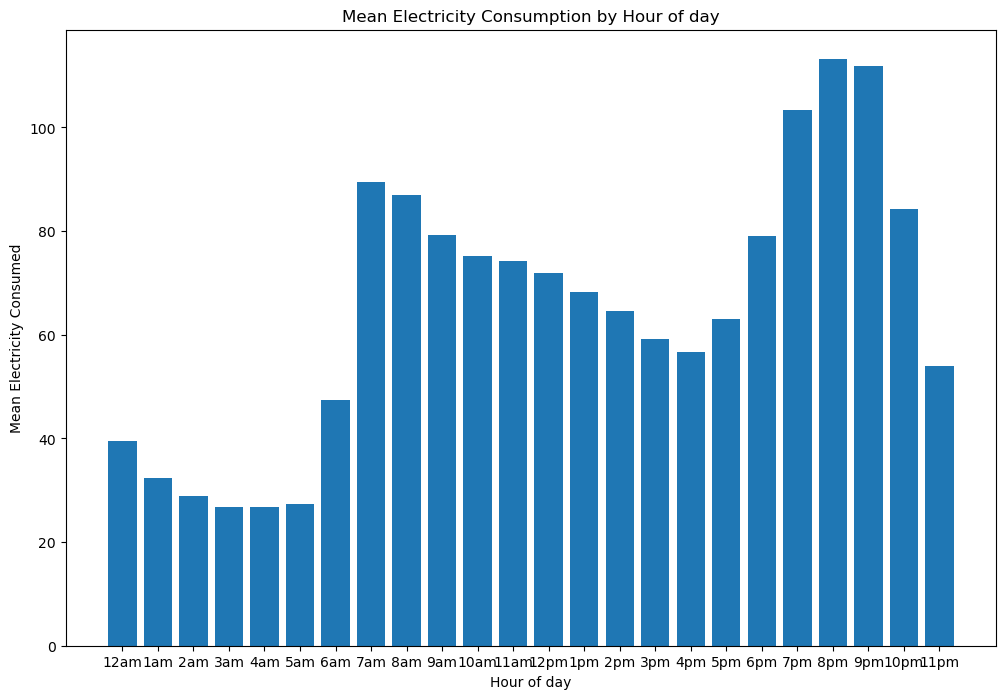

In [32]:
plt.bar(hourly_consumption.index, hourly_consumption.values, tick_label=hour_labels)
plt.xlabel('Hour of day')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Hour of day')
plt.show()

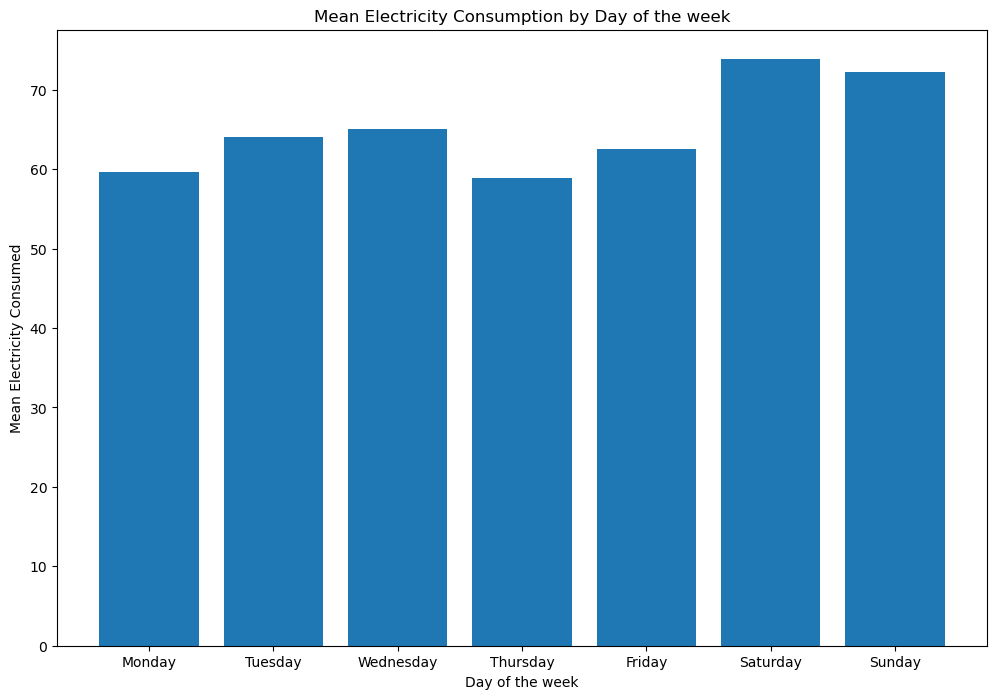

In [33]:
daily_consumption = hourly_data.groupby('day_of_week')['Global_active_power'].mean()
daily_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(daily_consumption.index, daily_consumption.values, tick_label=daily_labels)
plt.xlabel('Day of the week')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Day of the week')
plt.show()

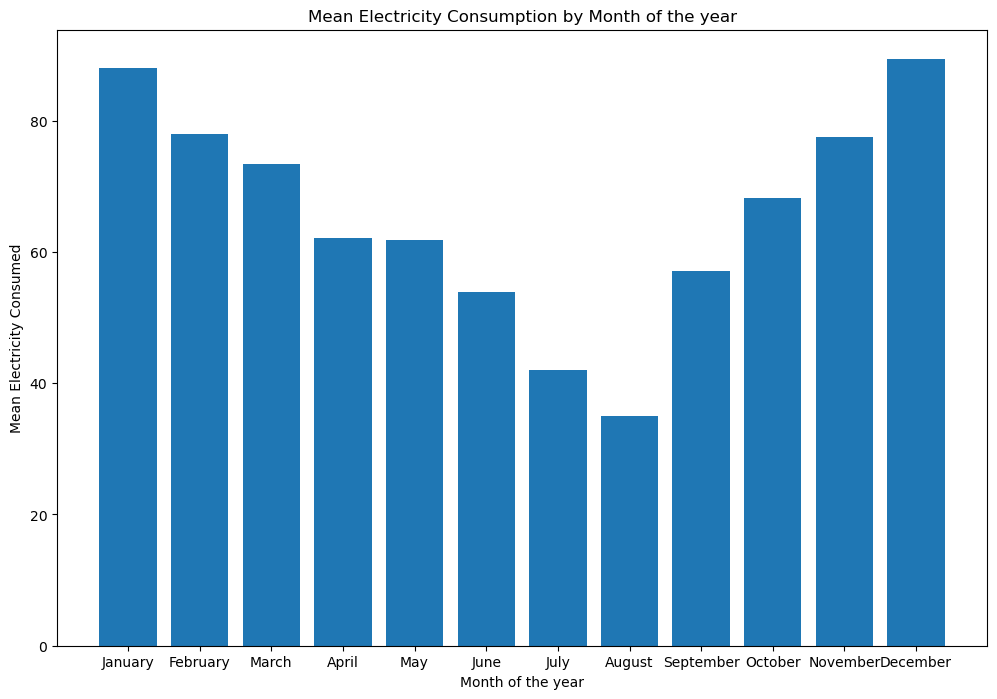

In [34]:
monthly_consumption = hourly_data.groupby('month')['Global_active_power'].mean()
monthly_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']
plt.bar(monthly_consumption.index, monthly_consumption.values, tick_label=monthly_labels)
plt.xlabel('Month of the year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Month of the year')
plt.show()

In [35]:
hourly_data['year'].unique()

array([2006, 2007, 2008, 2009, 2010], dtype=int32)

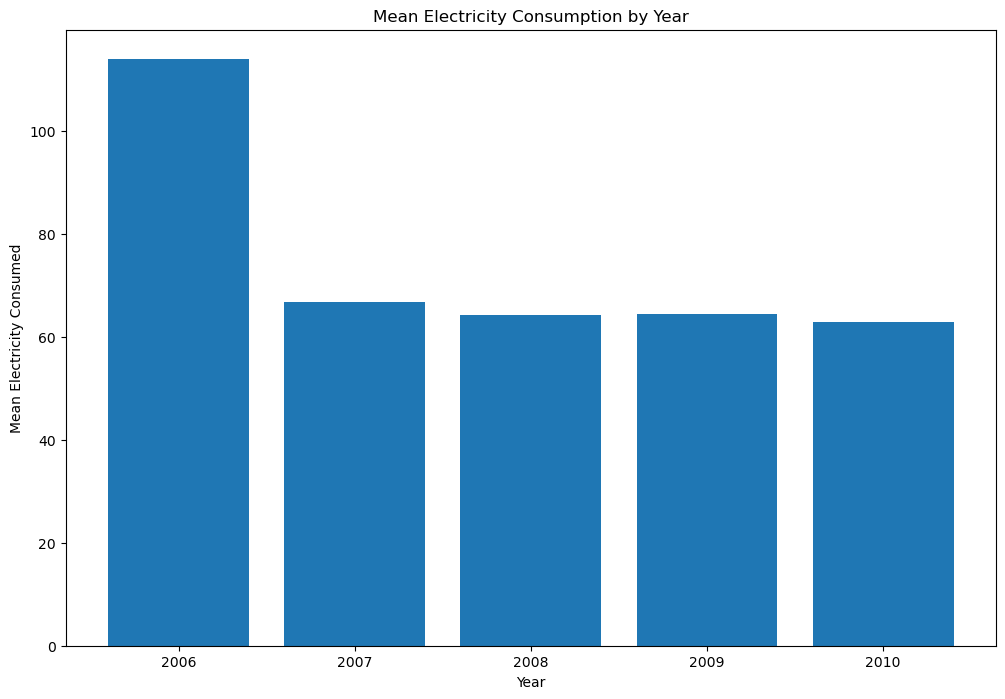

In [36]:
yearly_consumption = hourly_data.groupby('year')['Global_active_power'].mean()
year_labels = ['2006', '2007', '2008', '2009', '2010']
plt.bar(yearly_consumption.index, yearly_consumption.values, tick_label=year_labels)
plt.xlabel('Year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Year')
plt.show()

In [37]:
hourly_data.shape

(34589, 24)

In [38]:
hourly_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'rem_consumption', 'Global_active_power_winsorized',
       'Global_reactive_power_winsorized', 'Voltage_winsorized',
       'Global_intensity_winsorized', 'Sub_metering_1_winsorized',
       'Sub_metering_2_winsorized', 'Sub_metering_3_winsorized',
       'rem_consumption_winsorized', 'hour', 'day_of_week', 'month', 'year',
       'hour_category', 'day_category', 'month_category', 'year_category'],
      dtype='object')

In [39]:
endog_cols = ['Global_active_power_winsorized',
       'Global_reactive_power_winsorized', 'Voltage_winsorized',
       'Global_intensity_winsorized', 'Sub_metering_1_winsorized',
       'Sub_metering_2_winsorized', 'Sub_metering_3_winsorized',
       'rem_consumption_winsorized']
exog_cols = ['hour_category', 'day_category', 'month_category', 'year_category']

In [40]:
train_endog = hourly_data[endog_cols][:32000]
test_endog = hourly_data[endog_cols][-2589:]
train_exog = hourly_data[exog_cols][:32000]
exog_future = hourly_data[exog_cols][-2589:]

In [41]:
model = VAR(endog=train_endog, exog=train_exog)
for i in range(24):
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  62.0126794493442
BIC:  62.023146313321426

Order = 1
AIC:  59.05523138385539
BIC:  59.0824459790882

Order = 2
AIC:  58.9129390790918
BIC:  58.95690232736392

Order = 3
AIC:  58.85747087481059
BIC:  58.918183697986315

Order = 4
AIC:  58.826165892846156
BIC:  58.90362921287037

Order = 5
AIC:  58.78845865356224
BIC:  58.88267339246039

Order = 6
AIC:  58.74867565785498
BIC:  58.859642737733125

Order = 7
AIC:  58.71467538003104
BIC:  58.84239572307583

Order = 8
AIC:  58.68743200827028
BIC:  58.83190653674898

Order = 9
AIC:  58.6432970391187
BIC:  58.80452667537921

Order = 10
AIC:  58.603375903995165
BIC:  58.78136157046599

Order = 11
AIC:  58.587719528075596
BIC:  58.7824621472659

Order = 12
AIC:  58.562647692812156
BIC:  58.77414818731175

Order = 13
AIC:  58.547107057624444
BIC:  58.77536635010381

Order = 14
AIC:  58.529511716856106
BIC:  58.774530730066374

Order = 15
AIC:  58.5116495643084
BIC:  58.77342922108139

Order = 16
AIC:  58.499900687401826
BIC:  58.7

In [42]:
results = model.fit(10)

In [43]:
lag_order = results.k_ar
lag_order

10

In [44]:
z = results.forecast(y=train_endog.values[-lag_order:], steps=2589, exog_future=exog_future)
z

array([[ 2.03189810e+01,  7.35272904e+00,  1.44634798e+04, ...,
         2.70983513e+01,  2.51746982e+02,  5.28580813e+01],
       [ 1.82352751e+01,  7.37916962e+00,  1.44949983e+04, ...,
         2.98304204e+01,  2.79203166e+02, -2.04034749e+00],
       [ 1.67856773e+01,  7.62503268e+00,  1.44834447e+04, ...,
         3.16832016e+01,  2.80441434e+02, -2.36994707e+01],
       ...,
       [ 8.87481237e+01,  7.37274624e+00,  1.44284797e+04, ...,
         5.14417835e+01,  4.80198689e+02,  8.22586218e+02],
       [ 9.74178917e+01,  7.49071253e+00,  1.44105585e+04, ...,
         5.43409338e+01,  5.40377938e+02,  8.83897819e+02],
       [ 1.01459801e+02,  7.51558942e+00,  1.44041112e+04, ...,
         5.45503311e+01,  5.78069699e+02,  9.03793483e+02]])

In [45]:
test_endog.columns

Index(['Global_active_power_winsorized', 'Global_reactive_power_winsorized',
       'Voltage_winsorized', 'Global_intensity_winsorized',
       'Sub_metering_1_winsorized', 'Sub_metering_2_winsorized',
       'Sub_metering_3_winsorized', 'rem_consumption_winsorized'],
      dtype='object')

In [46]:
idx = pd.date_range('2010-08-11 01:00:00', periods=2589, freq='1H')
df_forecast = pd.DataFrame(z, index=idx, columns=test_endog.columns)
df_forecast

,Global_active_power_winsorized,Global_reactive_power_winsorized,Voltage_winsorized,Global_intensity_winsorized,Sub_metering_1_winsorized,Sub_metering_2_winsorized,Sub_metering_3_winsorized,rem_consumption_winsorized
2010-08-11 01:00:00,20.318981,7.352729,14463.479761,91.216060,6.671998,27.098351,251.746982,52.858081
2010-08-11 02:00:00,18.235275,7.379170,14494.998331,81.914973,-4.169355,29.830420,279.203166,-2.040347
2010-08-11 03:00:00,16.785677,7.625033,14483.444668,76.413015,-6.213906,31.683202,280.441434,-23.699471
2010-08-11 04:00:00,10.710536,7.112630,14484.165706,50.694157,-6.945913,25.770429,243.094813,-72.199803
2010-08-11 05:00:00,7.161635,7.570133,14488.900566,36.507230,-12.630337,30.064363,186.164656,-78.639169
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,57.138702,6.424798,14509.192762,240.838376,33.127768,40.269720,331.480270,513.558761
2010-11-26 18:00:00,74.287508,7.143891,14464.048467,313.090380,53.158758,46.895366,399.320199,695.193103
2010-11-26 19:00:00,88.748124,7.372746,14428.479682,373.433658,73.808636,51.441783,480.198689,822.586218
2010-11-26 20:00:00,97.417892,7.490713,14410.558543,409.391913,91.069389,54.340934,540.377938,883.897819


In [47]:
print("RMSE")
for col in test_endog.columns:
    RMSE = rmse(test_endog[col], df_forecast[col])
    print(f'{col}: {RMSE:.3f}')

RMSE
Global_active_power_winsorized: 37.905
Global_reactive_power_winsorized: 3.392
Voltage_winsorized: 142.608
Global_intensity_winsorized: 158.039
Sub_metering_1_winsorized: 135.552
Sub_metering_2_winsorized: 76.881
Sub_metering_3_winsorized: 399.532
rem_consumption_winsorized: 340.104


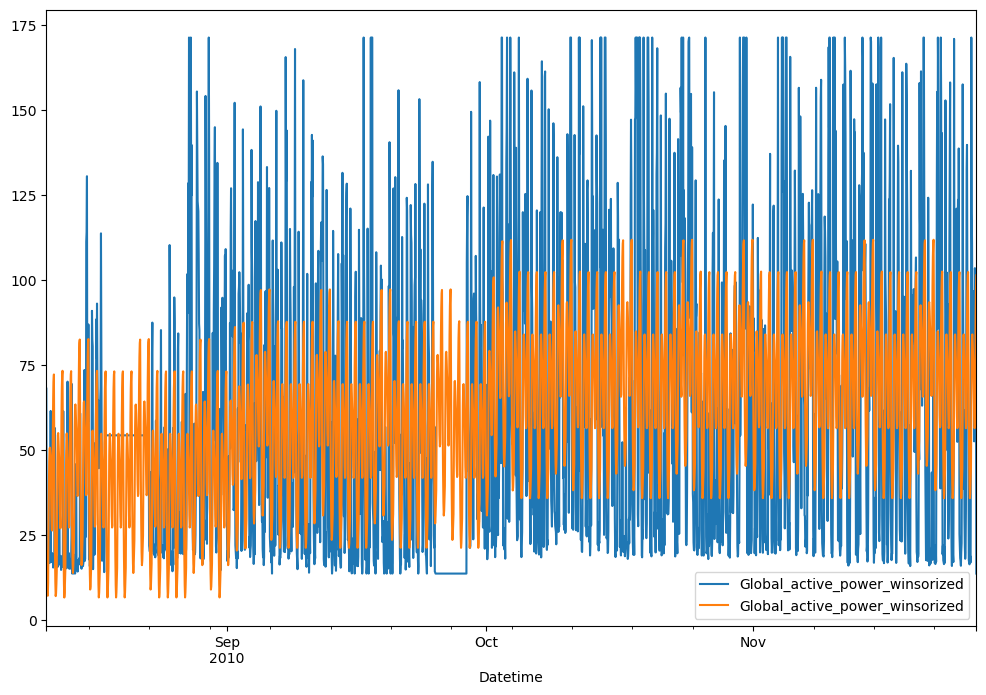

In [48]:
test_endog['Global_active_power_winsorized'].plot(legend=True)
df_forecast['Global_active_power_winsorized'].plot(legend=True);

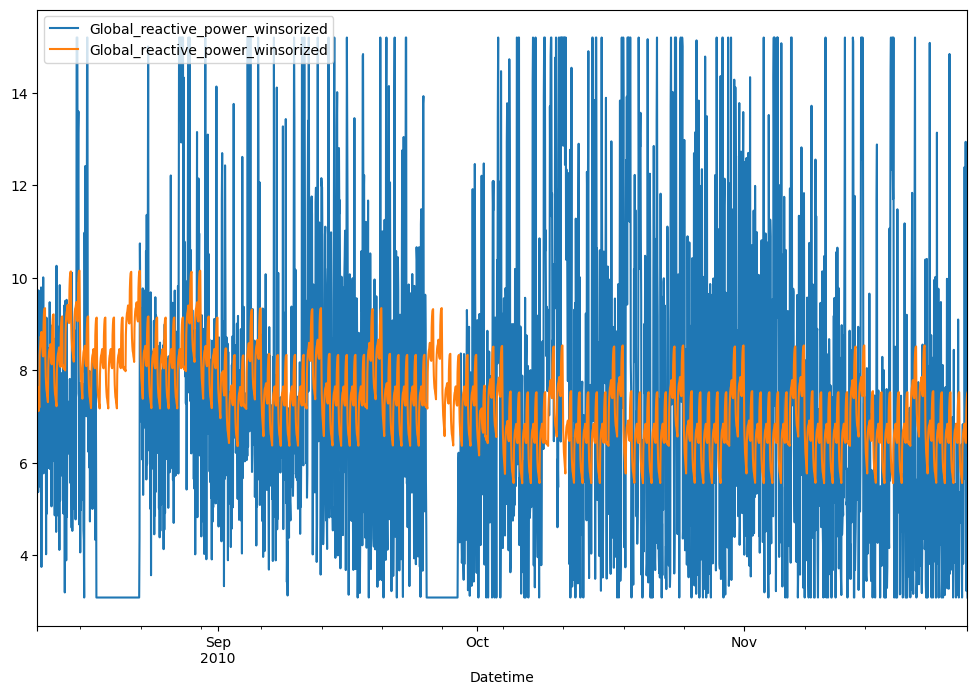

In [49]:
test_endog['Global_reactive_power_winsorized'].plot(legend=True)
df_forecast['Global_reactive_power_winsorized'].plot(legend=True);

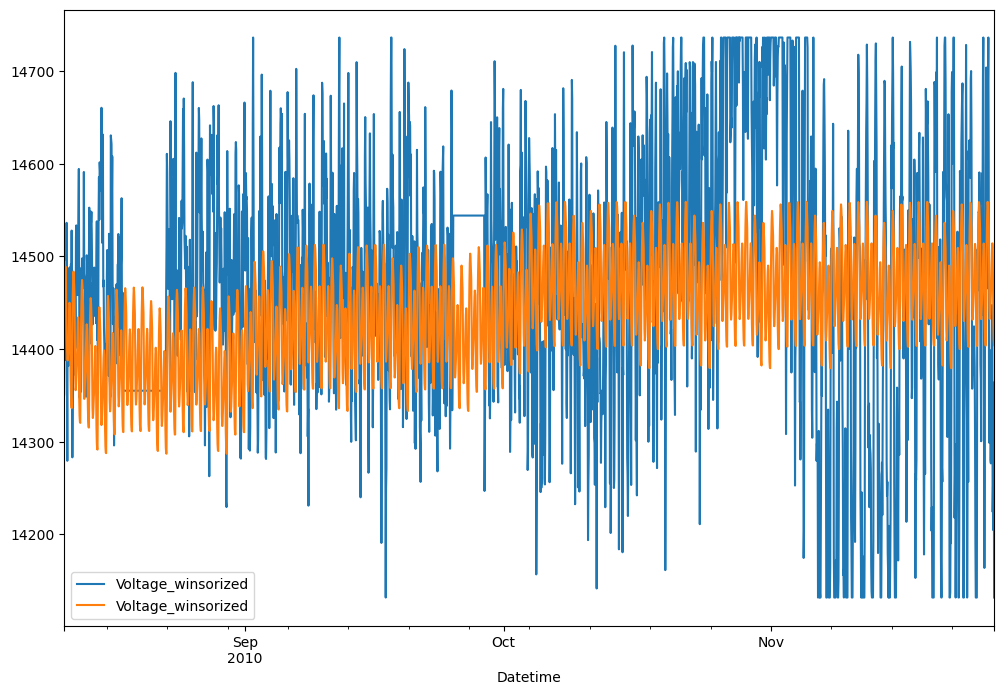

In [50]:
test_endog['Voltage_winsorized'].plot(legend=True)
df_forecast['Voltage_winsorized'].plot(legend=True);

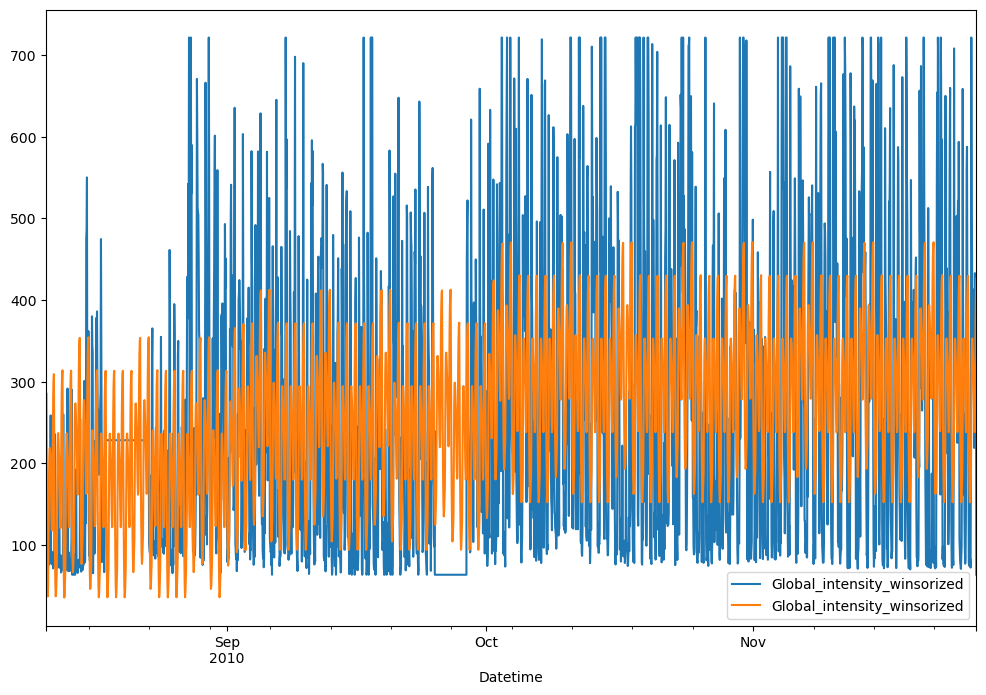

In [51]:
test_endog['Global_intensity_winsorized'].plot(legend=True)
df_forecast['Global_intensity_winsorized'].plot(legend=True);

# Sub metering 1 prediction

In [51]:
# Columns to winsorize
columns_to_winsorize = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply winsorization using scipy.stats.mstats.winsorize
for col in columns_to_winsorize:
    hourly_data[col + '_winsorized'] = winsorize(hourly_data[col], limits=(0.05, 0.05))

In [52]:
def map_hour_category(hour):
    if hour in [5, 6, 4, 3, 2, 1, 7, 0]:
        return 0
    elif hour in [17, 23, 16, 10]:
        return 1
    elif hour in [13, 18, 8, 9, 14, 15, 11, 12]:
        return 2
    elif hour in [22, 19, 20, 21]:
        return 3

def map_day_category(day):
    if day in [1, 3, 0, 4, 2]:
        return 0
    else:
        return 1

def map_month_category(month):
    if month in [8, 7]:
        return 0
    elif month in [4, 10, 9, 2, 5, 3]:
        return 1
    elif month in [11, 6, 12, 1]:
        return 2
    
def map_year_category(year):
    if year == 2006 or year == 2003:
        return 1
    else:
        return 0

In [53]:
hourly_data['hour_category'] = hourly_data['hour'].apply(map_hour_category)
hourly_data['day_category'] = hourly_data['day_of_week'].apply(map_day_category)
hourly_data['month_category'] = hourly_data['month'].apply(map_month_category)
hourly_data['year_category'] = hourly_data['year'].apply(map_year_category)

In [54]:
hourly_consumption = hourly_data.groupby('hour')['Sub_metering_1'].mean()
hourly_consumption.sort_values()

hour
5       2.278973
6       2.499653
4       2.957668
3       4.183900
2       8.814712
1      14.927828
7      18.229702
0      21.784178
17     42.371012
23     57.036086
16     57.170021
10     67.278279
13     75.965302
18     78.391817
8      81.364330
9      87.371964
14     87.488550
15     87.882026
11     88.874393
12     93.058987
22    132.392783
19    154.772538
20    165.040915
21    167.443828
Name: Sub_metering_1, dtype: float64

In [55]:
daily_consumption = hourly_data.groupby('day_of_week')['Sub_metering_1'].mean()
daily_consumption.sort_values()

day_of_week
1     47.099110
3     47.878641
0     49.475526
4     52.216309
2     63.471481
5    101.230363
6    105.341222
Name: Sub_metering_1, dtype: float64

In [56]:
monthly_consumption = hourly_data.groupby('month')['Sub_metering_1'].mean()
monthly_consumption.sort_values()

month
8     29.114919
7     42.437836
4     63.145833
10    63.924059
9     67.251389
2     67.914086
5     74.092406
3     75.154234
11    77.462257
6     78.302083
12    78.697961
1     85.010753
Name: Sub_metering_1, dtype: float64

In [57]:
yearly_consumption = hourly_data.groupby('year')['Sub_metering_1'].mean()
yearly_consumption.sort_values()

year
2010    57.840869
2008    66.578438
2009    67.660502
2007    73.350571
2006    75.029973
Name: Sub_metering_1, dtype: float64

In [58]:
hourly_data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Global_active_power_winsorized',
       'Global_reactive_power_winsorized', 'Voltage_winsorized',
       'Global_intensity_winsorized', 'hour', 'day_of_week', 'month', 'year',
       'hour_category', 'day_category', 'month_category', 'year_category',
       'Sub_metering_1_winsorized', 'Sub_metering_2_winsorized',
       'Sub_metering_3_winsorized'],
      dtype='object')

In [59]:
# Columns to winsorize
columns_to_winsorize = ['Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']

# Apply winsorization using scipy.stats.mstats.winsorize
for col in columns_to_winsorize:
    hourly_data[col + '_winsorized'] = winsorize(hourly_data[col], limits=(0.05, 0.05))

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [62]:
adf_test(hourly_data['Sub_metering_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -22.953349
p-value                     0.000000
# lags used                51.000000
# observations          34537.000000
critical value (1%)        -3.430539
critical value (5%)        -2.861624
critical value (10%)       -2.566815
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


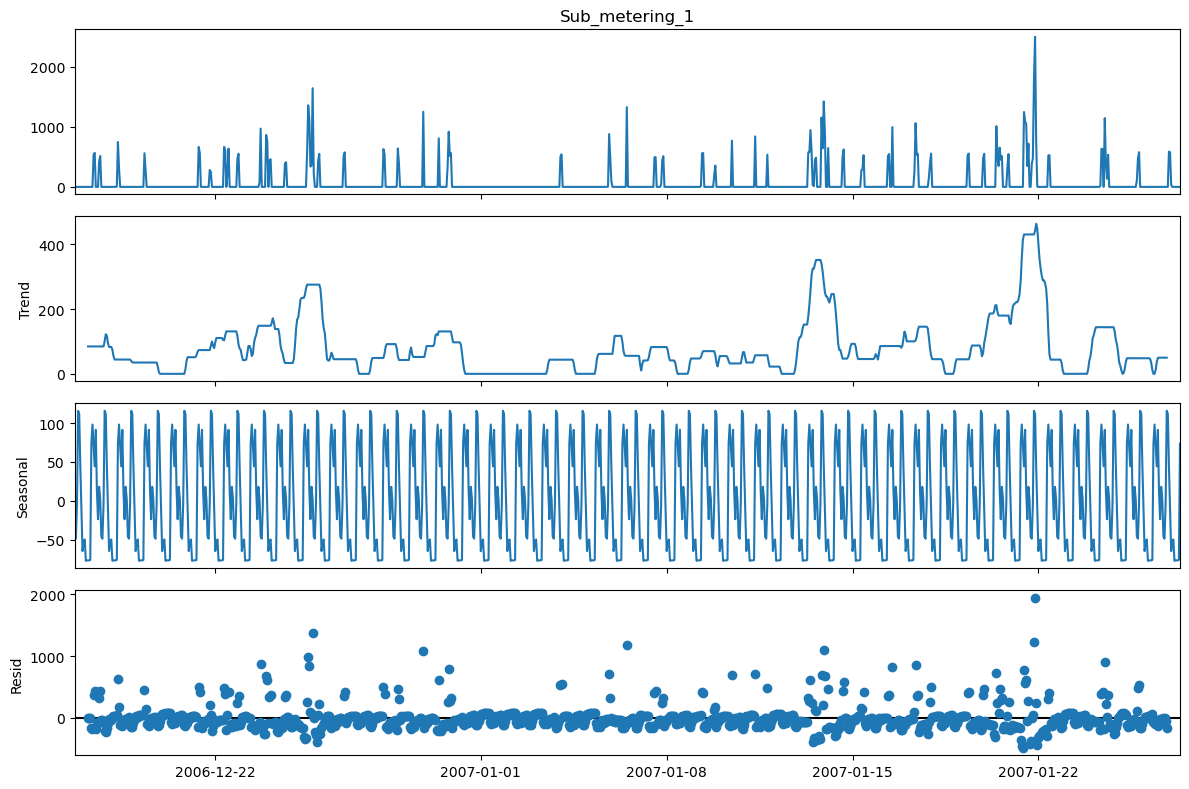

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hourly_data['Sub_metering_1'][:1000])
result.plot();

In [64]:
# it appears to be seasonal

In [65]:
endog_cols = ['Sub_metering_1_winsorized']
exog_cols = ['hour_category', 'day_category', 'month_category', 'year_category']

In [66]:
train_endog = hourly_data[endog_cols][:32000]
test_endog = hourly_data[endog_cols][-2589:]
train_exog = hourly_data[exog_cols][:32000]
exog_future = hourly_data[exog_cols][-2589:]

In [67]:
model = SARIMAX(train_endog['Sub_metering_1_winsorized'],exog=train_exog,
                order=(8,0,0),seasonal_order=(0,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29098D+00    |proj g|=  6.18852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      1      4      1     0     0   1.937D-05   6.291D+00
  F =   6.2909751616309997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Sub_metering_1_winsorized   No. Observations:                32000
Model:                      SARIMAX(8, 0, 0)   Log Likelihood             -201311.205
Date:                       Sun, 23 Jun 2024   AIC                         402648.410
Time:                               12:15:52   BIC                         402757.266
Sample:                           12-16-2006   HQIC                        402683.231
                                - 08-11-2010                                         
Covariance Type:                         opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
hour_category     30.8181      0.826     37.290      0.000      29.198      32.438
day_category      30.1881      2.284     13.215      0.000      25.711      34.665
month_category     6.0964      1.649      3.698      0.000       2.865       9.328
year_category     -6.3282     10.627     -0.595      0.552     -27.157      14.500
ar.L1              0.4143      0.004     98.030      0.000       0.406       0.423
ar.L2             -0.0338      0.004     -8.570      0.000      -0.042      -0.026
ar.L3              0.0057      0.005      1.203      0.229      -0.004       0.015
ar.L4              0.0117      0.006      2.105      0.035       0.001       0.023
ar.L5             -0.0097      0.006     -1.636      0.102      -0.021       0.002
ar.L6             -0.0012      0.006     -0.188      0.851      -0.014       0.011
ar.L7             -0.0079      0.007     -1.150      0.250      -0.021       0.006
ar.L8             -0.0036      0.006     -0.566      0.571      -0.016       0.009
sigma2          1.706e+04    129.361    131.847      0.000    1.68e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55591.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
# Obtain predicted values
start=len(train_endog)
end=len(train_endog)+len(test_endog)-1
predictions = results.predict(start=start, end=end, exog=exog_future).rename('SARIMAX(8,0,0)(0,0,0,7) Predictions')

In [72]:
error = rmse(test_endog['Sub_metering_1_winsorized'], predictions)
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error:11.10}')

SARIMA(1,0,0)(2,0,0,7) RMSE Error:  134.930948


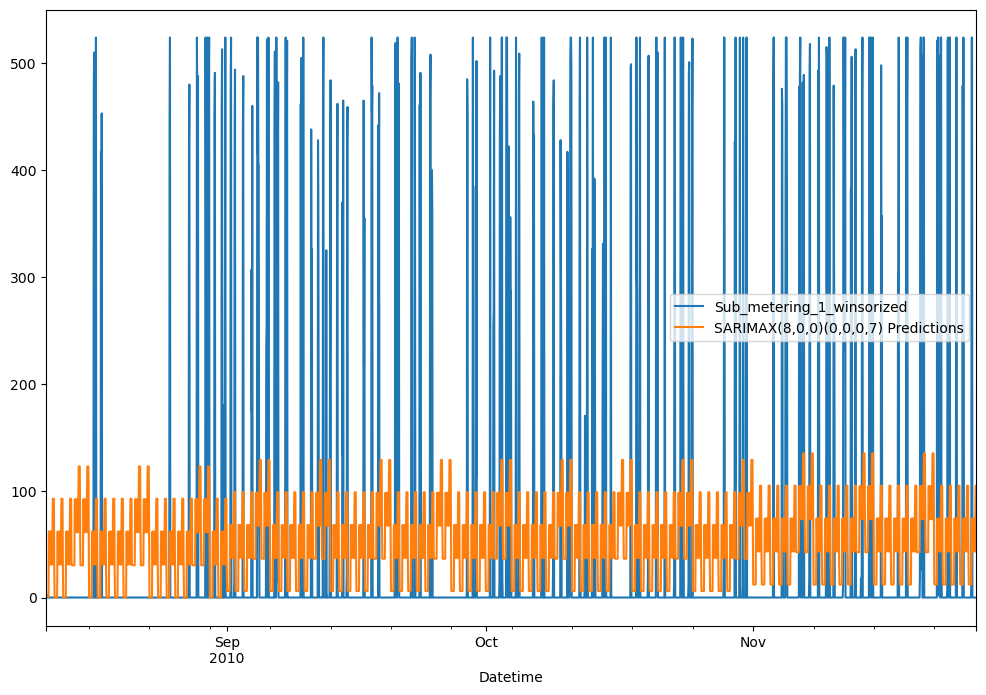

In [73]:
test_endog['Sub_metering_1_winsorized'].plot(legend=True)
predictions.plot(legend=True);

# Sub metering 2 prediction

In [112]:
def map_hour_category(hour):
    if 23 >= hour >= 23 or 0 <= hour <= 6:
        return -2
    elif 7 <= hour <= 13:
        return 6
    elif 14 <= hour <= 17:
        return 2
    elif 18 <= hour <= 22:
        return 10

def map_day_category(day):
    if 0 <= day <= 4:
        return -2
    elif day == 5 or day == 6:
        return 4

def map_month_category(month):
    if month in [1, 12]:
        return 15
    elif month in [2, 3, 10, 11]:
        return 7
    elif month in [4, 5, 6, 9]:
        return 0
    elif month in [7, 8]:
        return -2

In [ ]:
hourly_data['hour_category'] = hourly_data['hour'].apply(map_hour_category)
hourly_data['day_category'] = hourly_data['day_of_week'].apply(map_day_category)
hourly_data['month_category'] = hourly_data['month'].apply(map_month_category)

In [74]:
hourly_consumption = hourly_data.groupby('hour')['Sub_metering_2'].mean()
hourly_consumption.sort_values()

hour
5      19.053435
6      20.154060
4      20.156836
3      21.091603
2      21.092991
1      23.929216
7      30.131853
0      33.262318
23     49.657876
8      60.108258
9      64.233865
22     69.608605
10     91.727967
21    105.773925
18    106.809293
16    110.130465
20    113.271151
17    114.517337
11    118.525330
12    121.683553
15    122.559334
19    125.655340
13    144.303956
14    147.024289
Name: Sub_metering_2, dtype: float64

In [ ]:
daily_consumption = hourly_data.groupby('day_of_week')['Sub_metering_2'].mean()
daily_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(daily_consumption.index, daily_consumption.values, tick_label=daily_labels)
plt.xlabel('Day of the week')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Day of the week')
plt.show()

In [ ]:
monthly_consumption = hourly_data.groupby('month')['Sub_metering_2'].mean()
plt.bar(monthly_consumption.index, monthly_consumption.values, tick_label=monthly_labels)
plt.xlabel('Month of the year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Month of the year')
plt.show()

In [ ]:
model = VAR(endog=train_endog, exog=train_exog)
for i in range(24):
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

In [ ]:
results = model.fit(7)

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
z = results.forecast(y=train_endog.values[-lag_order:], steps=2589, exog_future=exog_future)
z

In [ ]:
idx = pd.date_range('2010-08-11 01:00:00', periods=2589, freq='1H')
df_forecast = pd.DataFrame(z, index=idx, columns=['Sub_metering_2'])
df_forecast

In [ ]:
print("RMSE")
for col in test_endog.columns:
    RMSE = rmse(test_endog[col], df_forecast[col])
    print(f'{col}: {RMSE:.3f}')

In [ ]:
test_endog['Sub_metering_2'][:1000].plot(legend=True)
df_forecast['Sub_metering_2'][:1000].plot(legend=True);

# Sub metering 3 prediction

In [ ]:
def map_hour_category(hour):
    if 23 >= hour >= 23 or 0 <= hour <= 6:
        return -2
    elif 7 <= hour <= 13:
        return 6
    elif 14 <= hour <= 17:
        return 2
    elif 18 <= hour <= 22:
        return 10

def map_day_category(day):
    if 0 <= day <= 4:
        return -2
    elif day == 5 or day == 6:
        return 4

def map_month_category(month):
    if month in [1, 12]:
        return 15
    elif month in [2, 3, 10, 11]:
        return 7
    elif month in [4, 5, 6, 9]:
        return 0
    elif month in [7, 8]:
        return -2

In [ ]:
hourly_data['hour_category'] = hourly_data['hour'].apply(map_hour_category)
hourly_data['day_category'] = hourly_data['day_of_week'].apply(map_day_category)
hourly_data['month_category'] = hourly_data['month'].apply(map_month_category)

In [ ]:
hourly_consumption = hourly_data.groupby('hour')['Sub_metering_3'].mean()
plt.bar(hourly_consumption.index, hourly_consumption.values, tick_label=hour_labels)
plt.xlabel('Hour of day')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Hour of day')
plt.show()

In [ ]:
daily_consumption = hourly_data.groupby('day_of_week')['Sub_metering_3'].mean()
daily_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(daily_consumption.index, daily_consumption.values, tick_label=daily_labels)
plt.xlabel('Day of the week')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Day of the week')
plt.show()

In [ ]:
monthly_consumption = hourly_data.groupby('month')['Sub_metering_3'].mean()
plt.bar(monthly_consumption.index, monthly_consumption.values, tick_label=monthly_labels)
plt.xlabel('Month of the year')
plt.ylabel('Mean Electricity Consumed')
plt.title('Mean Electricity Consumption by Month of the year')
plt.show()

In [ ]:
model = VAR(endog=train_endog, exog=train_exog)
for i in range(24):
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

In [ ]:
results = model.fit(7)

In [ ]:
lag_order = results.k_ar
lag_order

In [ ]:
z = results.forecast(y=train_endog.values[-lag_order:], steps=2589, exog_future=exog_future)
z

In [ ]:
idx = pd.date_range('2010-08-11 01:00:00', periods=2589, freq='1H')
df_forecast = pd.DataFrame(z, index=idx, columns=['Sub_metering_3'])
df_forecast

In [ ]:
print("RMSE")
for col in test_endog.columns:
    RMSE = rmse(test_endog[col], df_forecast[col])
    print(f'{col}: {RMSE:.3f}')

In [ ]:
test_endog['Sub_metering_3'][:1000].plot(legend=True)
df_forecast['Sub_metering_3'][:1000].plot(legend=True);